# Exercise 3: Part C

This exercise is about text classification.

## Task 1: Text Classification

Use the [`fetch_20newsgroups()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) function to load the dataset. Then train a logistic regression classifier on a test set and evaluate it on the training set.

* i) For which classes did your classifier perform well?
* ii) For which classes did it not perform well?
* iii) To which classes was each class assigned incorrectly the most?

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import sklearn as sk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
from sklearn.datasets import fetch_20newsgroups

#some transformation that are specific to the 20newsgroups function are required

#fetch_20newsgroups is a function
data_train = fetch_20newsgroups(subset="train")
X_train = data_train.data

#Convert a collection of raw documents to a matrix of TF-IDF features
vec = TfidfVectorizer()

clf = LogisticRegression(multi_class="ovr")
clf.fit(X_train, y_train)

data_test = fetch_20newsgroups(subset="test")
X_test = vec.transform(data_test.data)
y_test = [data_test.target_names[x] for x in data_test.target]

#Make predictions
plt.figure(figsize=(50, 50))
pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
    y_test, pred, xticks_rotation="vertical"
)
plt.show()

function

## Task 2: Confusion Matrix

The code below has broken. You still have the correct output (the confusion matrix). Restore the variable `y_true`!

In [7]:
# Alte Testaufgabe
from sklearn.metrics import confusion_matrix
y_true = [1, 2, 3, 1, 5, 5, 2, 1, 3, 2, 5, 4, 4, 4, 5]
# 3 ones 
# YOUR CODE HERE
y_pred = [1, 2, 4, 5, 5, 5, 2, 1, 3, 2, 2, 3, 5, 5, 1]
confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5])

array([[2, 0, 0, 0, 1],
       [0, 3, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 2],
       [1, 1, 0, 0, 2]])

## Task 3: Metrics

What are the Precision, Recall and F1-Measure for class `5` in the previous task? Calculate the metrics by hand and confirm your results programmatically!

In [29]:
score1 = precision_score(y_true,y_pred,average=None)
score2 = recall_score(y_true,y_pred,average=None)
score3 = f1_score(y_true,y_pred,average=None)
print(score1)
print(score2)
print(score3)

[0.66666667 0.75       0.5        0.         0.4       ]
[0.66666667 1.         0.5        0.         0.5       ]
[0.66666667 0.85714286 0.5        0.         0.44444444]


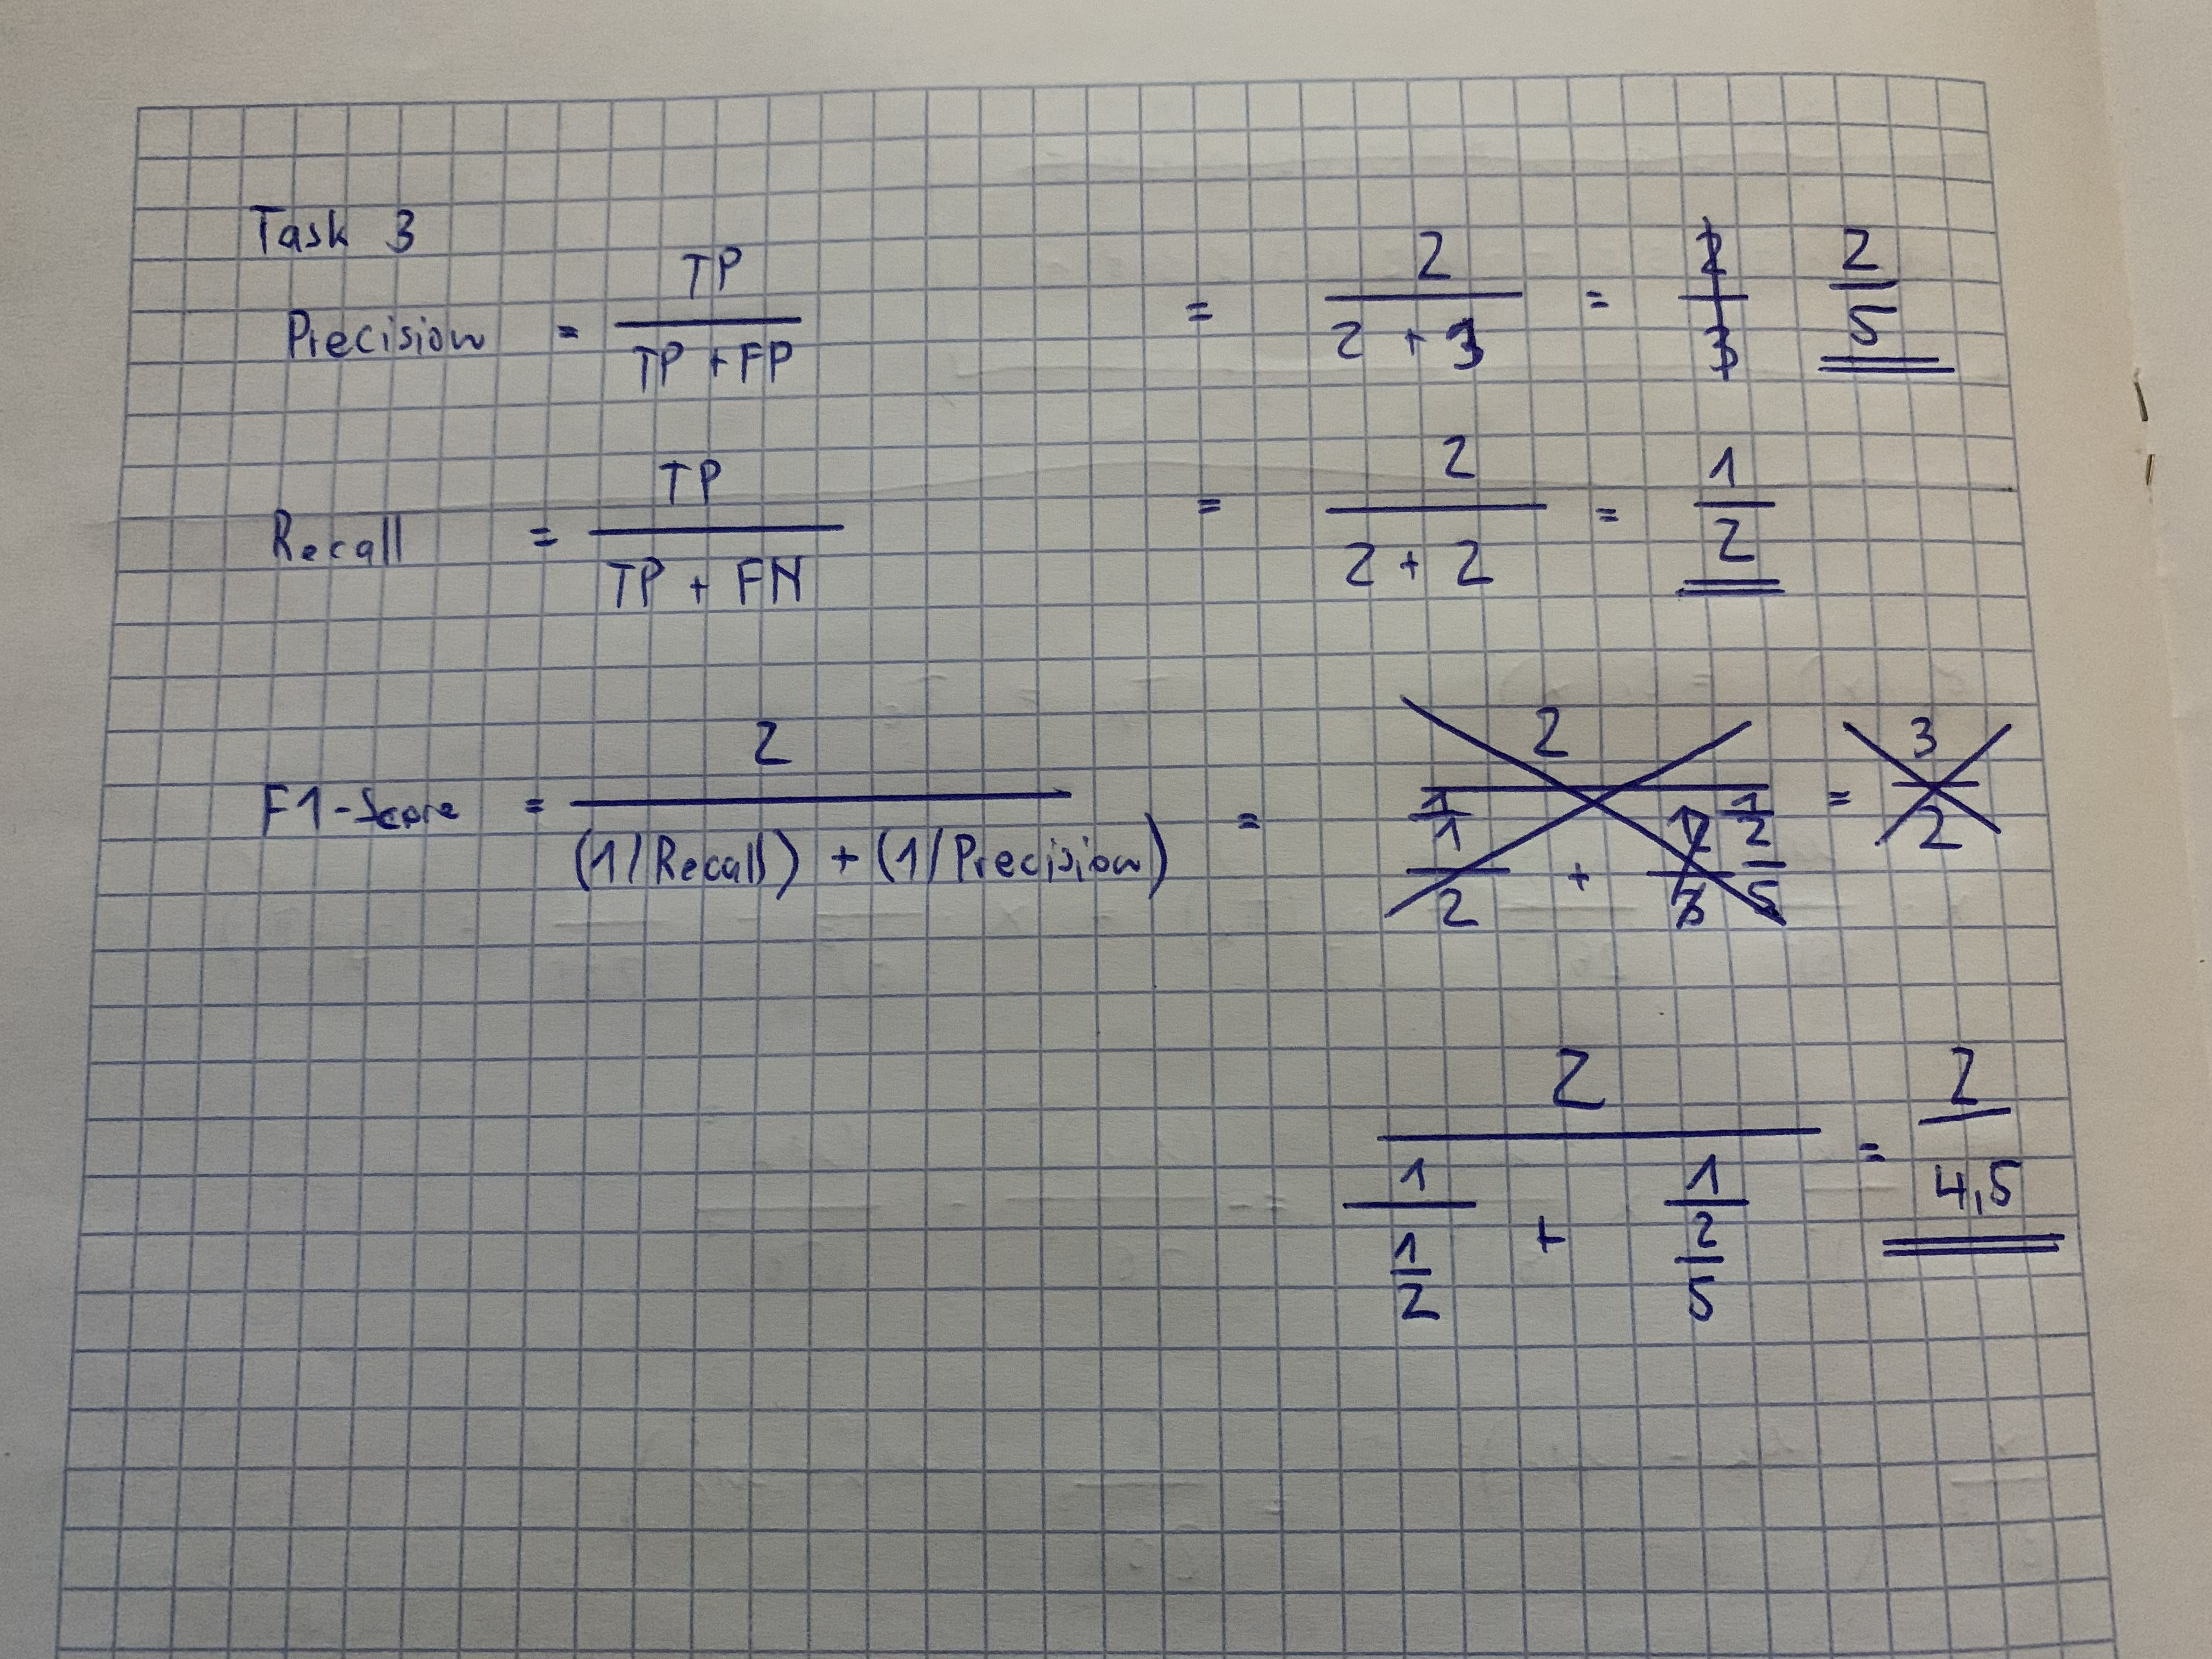

## Task 4: Accuracy

In certain cases the accuracy metric can be misleading. Construct one such example and explain what you could do instead.

In [35]:
# Disease = 0, Healtyh = 1

# Good accuracy can be misleading. If we have a bad disease and predict it as disease 10'000 and 1 time its wrong, the accuracy is very high, but indeed our prediction is bad.

y_true = ['Healthy'] * 100000
y_true[0] = 'Diseasd'

predictions = ['Healthy'] * 100000

score = accuracy_score(y_true,predictions)
print(score)

0.99999


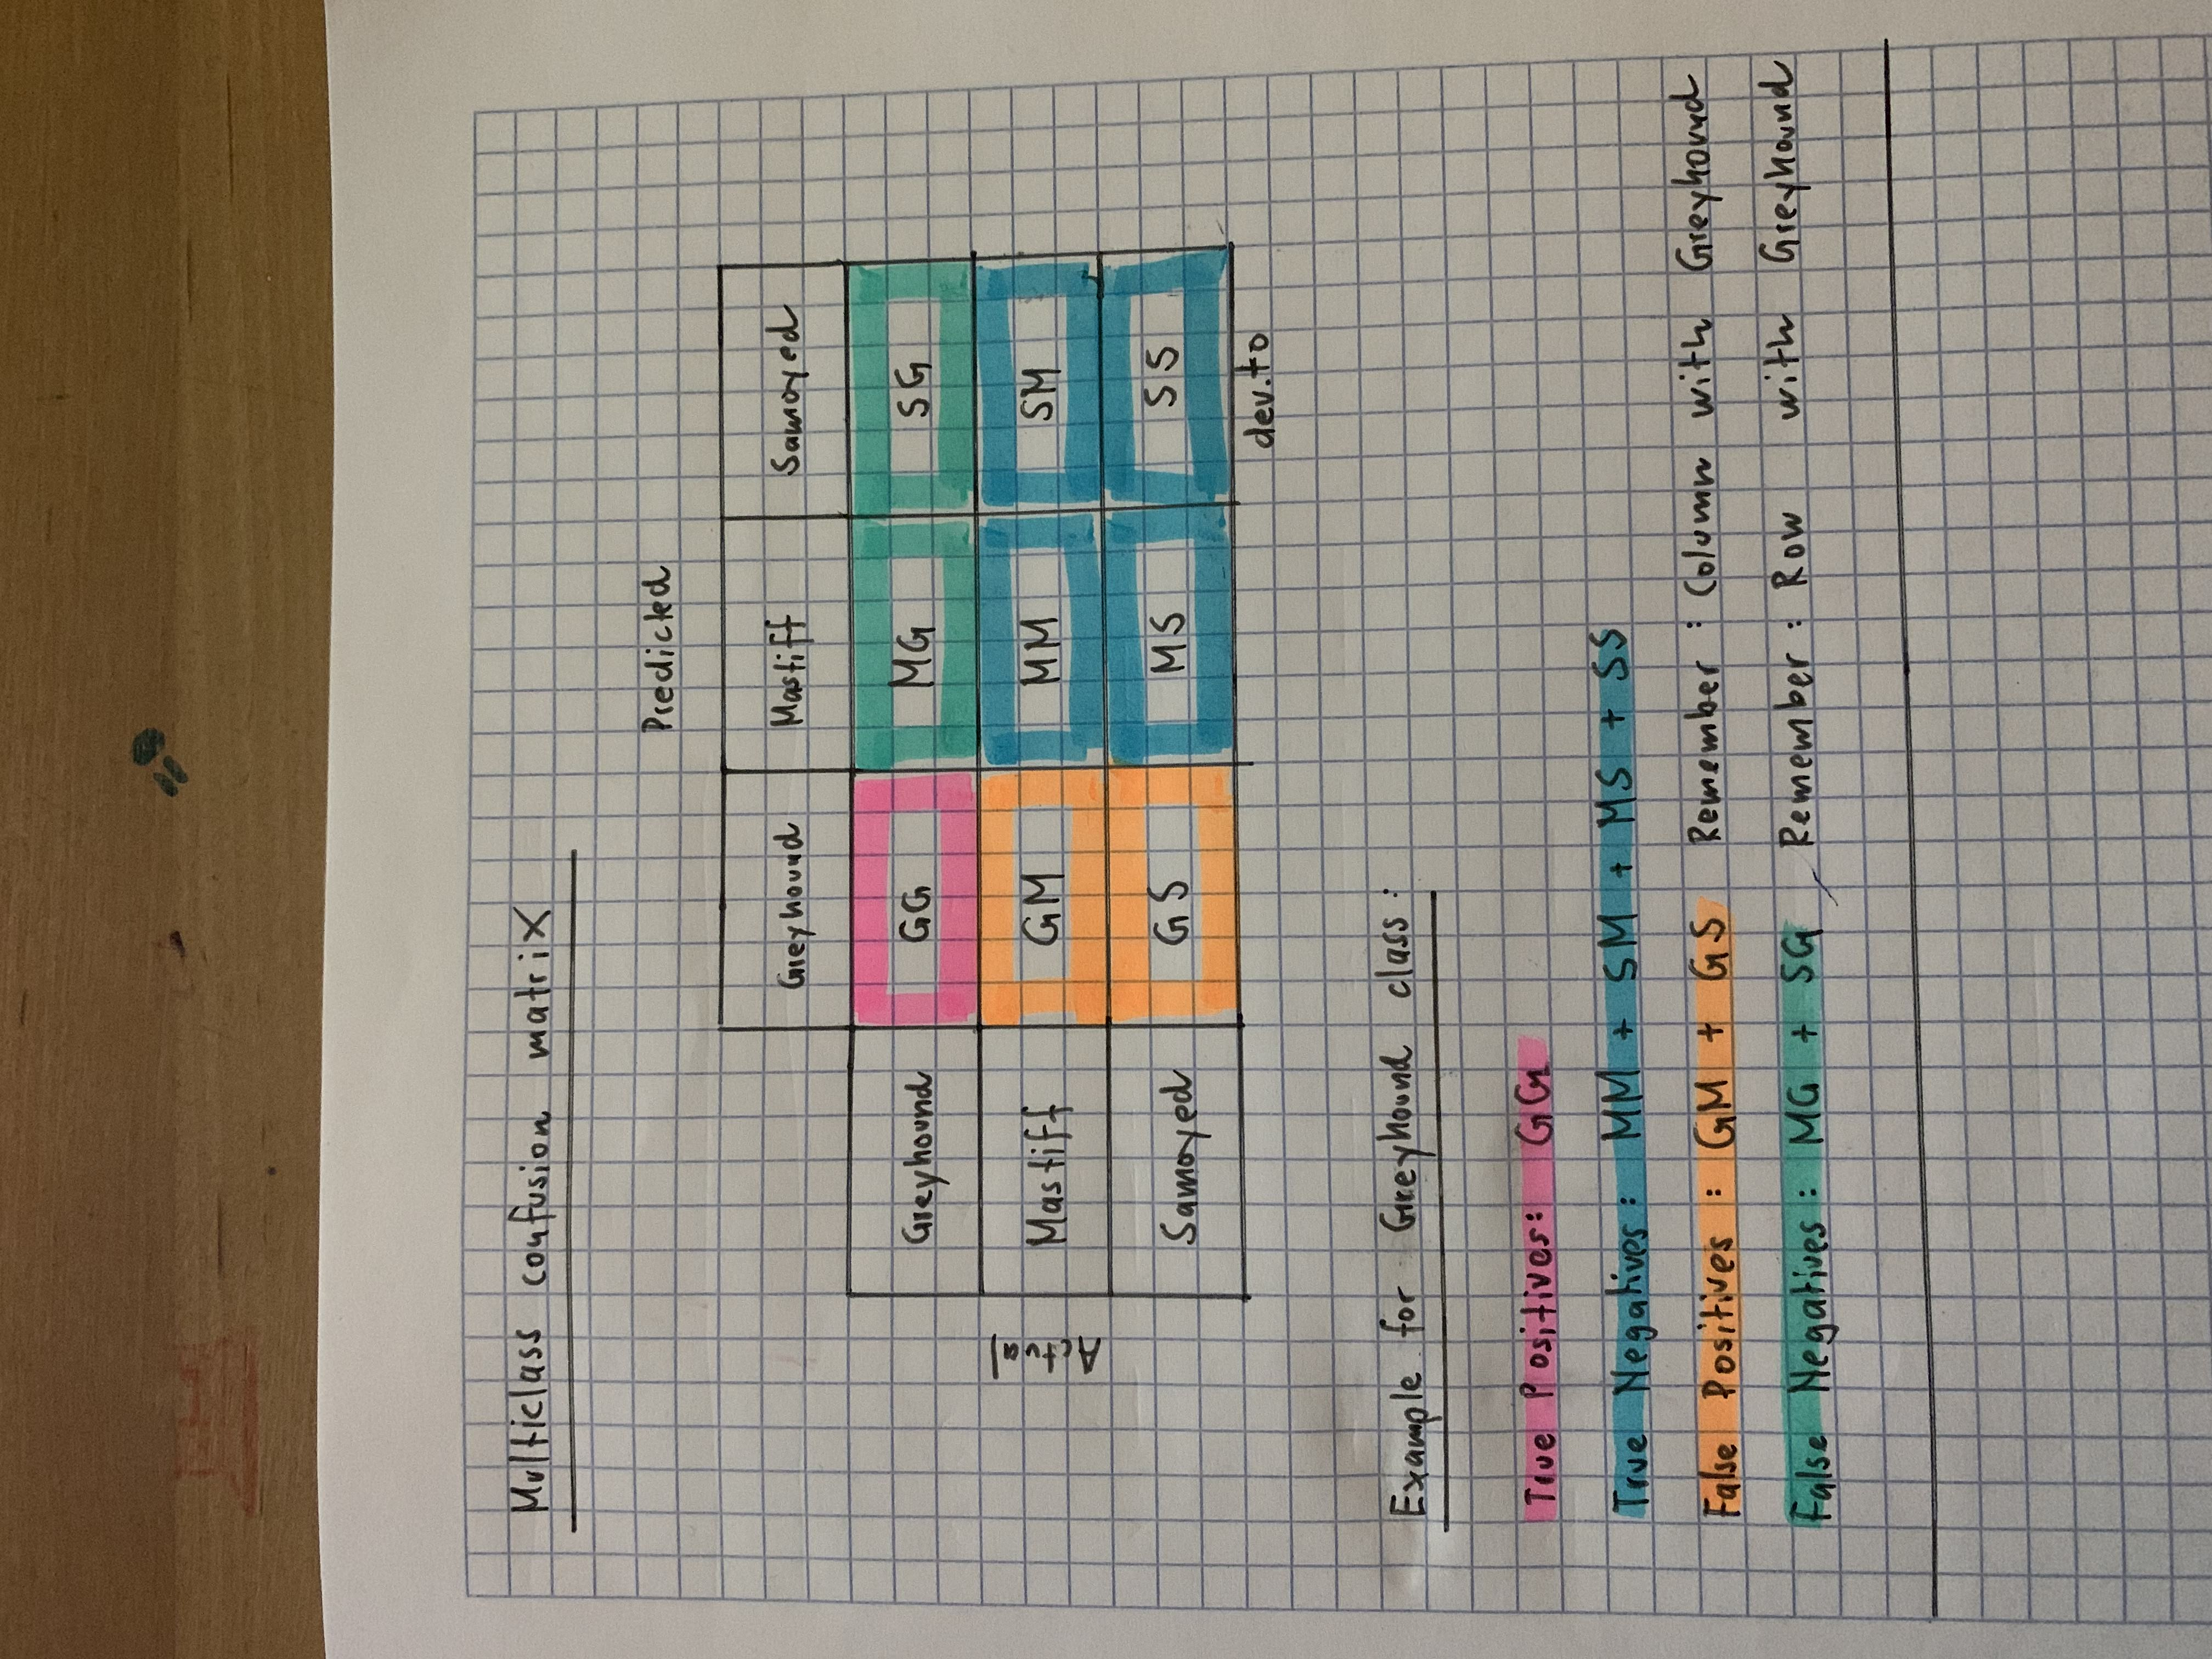